# Multiple AP Clock Skew Experiment
## Environment of experiment

Schematic diagram:
![](https://i.imgur.com/sdAdn8C.png)
AP1 connects with my computer

I can get three beacon:

    1. from AP1(broadcast)
    2. from AP2(broadcast)
    3. from AP3(broadcast)



In [3]:
from scapy.all import *
import sys
import matplotlib.pyplot as pyplot

## Read the pcap file

In [4]:
pcap = rdpcap(r'../datasets/TP-LINK_1wBeacon.pcap')
print('pcap', pcap)
print(len(pcap))

pcap<TP-LINK_1wBeacon.pcap: TCP:0 UDP:3 ICMP:0 Other:10123>
10126


## Functions
### getTheBeacon
input: packet(pcap file), ssid(string)

output: beacon packets from device with the ssid

### proccessTimestamp
input: beacon packets(packets list)

output: (oi, xi)

In [5]:
def getTheBeacon(packet, ssid):
    packets = []
    for i in range(0, len(packet)):
        if packet[i].haslayer(Dot11):
            if packet[i].type == 0 and packet[i].subtype == 8:
                if hasattr(packet[i], 'info'):
                    # Check the packet is from target AP
                    if (packet[i].info == ssid):
                        packets.append(pcap[i])
    return packets

def proccessTimestamp(packets):
    xi = []
    oi = []
    time0 = packets[0].time
    tsf0 = packets[0][Dot11].timestamp
    for i in range(0, len(packets)):
        time = packets[i].time
        tsf = packets[i][Dot11].timestamp
        xi.append((time - time0) * pow(10, 6))
        oi.append((tsf - tsf0) - xi[i])

    # find unusual datas
    weired = []
    for i in range(1, len(oi)):
        if (oi[i] / xi[i] <= 0):
            weired.append(i)
    # delete
    for i in range(0, len(weired)):
        del oi[weired[i] - i]
        del xi[weired[i] - i]
    return (oi, xi)

## Show clock skew from device1 and device2


The number of beacon packets from TP-Link_0B54: 2966
The number of beacon packets from Sapido_BRF70n_d08266: 2075
The number of beacon packets from Sapido_BRF70n_d08266: 53
device1:


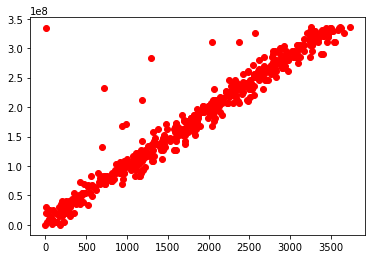

device2:


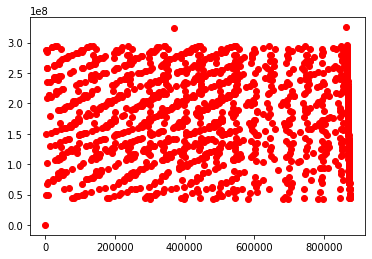

device3:


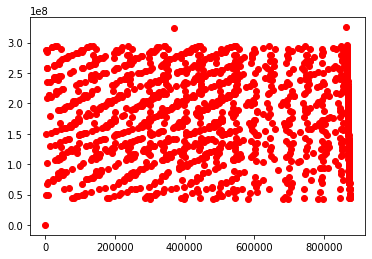

In [7]:
tp = getTheBeacon(pcap, b'TP-Link_0B54')
sapido = getTheBeacon(pcap, b'Sapido_BRF70n_d08266')
dlink = getTheBeacon(pcap, b'647N3F')
print(r'The number of beacon packets from TP-Link_0B54:', len(tp))
print(r'The number of beacon packets from Sapido_BRF70n_d08266:', len(sapido))
print(r'The number of beacon packets from Sapido_BRF70n_d08266:', len(dlink))
count = 2000

print('(oi, xi) of AP1:')
oi1, xi1 = proccessTimestamp(tp)
plt.plot(oi1[0:count], xi1[0:count], 'ro')
plt.show()
print('(oi, xi) of AP2:')
oi2, xi2 = proccessTimestamp(sapido)
plt.plot(oi2[0:count], xi2[0:count], 'ro')
plt.show()
print('(oi, xi) of AP3:')
oi3, xi3 = proccessTimestamp(sapido)
plt.plot(oi3[0:count], xi3[0:count], 'ro')
plt.show()